In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

import warnings
warnings.filterwarnings('ignore')

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
store = prepare.prepare_store()

In [3]:
store.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-02,1,11.0,2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Wednesday,9.24
2013-01-03,1,14.0,3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Thursday,11.76
2013-01-04,1,13.0,4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Friday,10.92
2013-01-05,1,10.0,5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Saturday,8.40


In [8]:
df = pd.DataFrame(store.groupby(store.index.date).sales_total.sum())

df.head()

,sales_total
2013-01-01,73844.01
2013-01-02,73570.58
2013-01-03,78169.48
2013-01-04,84467.73
2013-01-05,87621.85


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_total  1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5+ KB


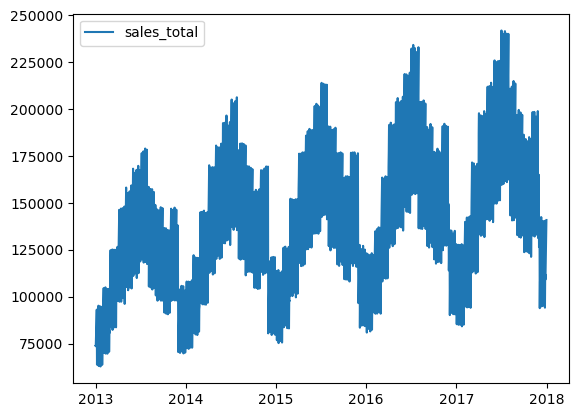

In [10]:
df.plot()

plt.show()

In [18]:
df.index = pd.to_datetime(df.index)

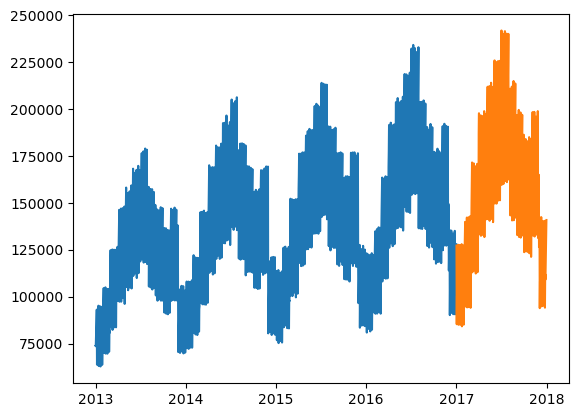

In [19]:
train = df.loc[:'2016'].copy()
test = df.loc['2017':].copy()

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

# Visualizations

In [20]:
y = train.sales_total

**Histogram**

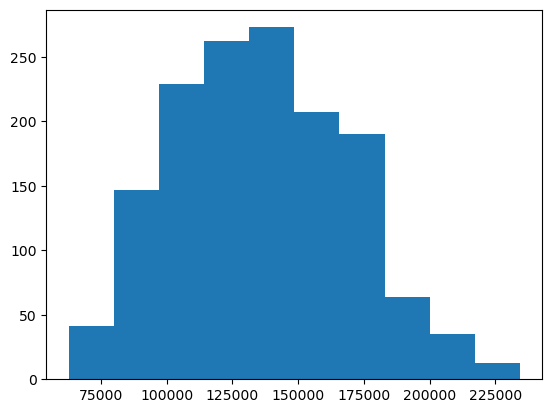

In [21]:
plt.hist(train.sales_total)
plt.show()

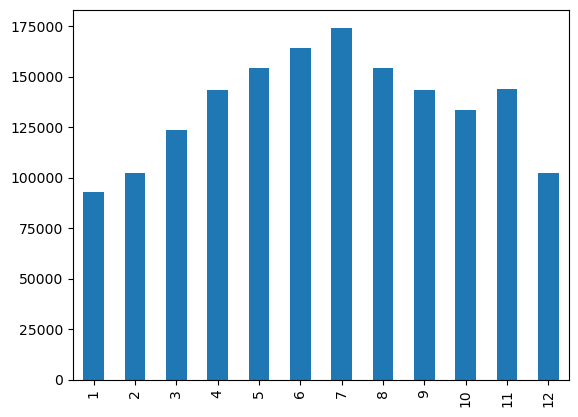

In [24]:
train.groupby(train.index.month).sales_total.mean().plot.bar()

plt.show()

In [45]:
train['day_num'] = train.index.weekday

In [46]:
train.day_num

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
             ..
2016-12-27    1
2016-12-28    2
2016-12-29    3
2016-12-30    4
2016-12-31    5
Name: day_num, Length: 1461, dtype: int64

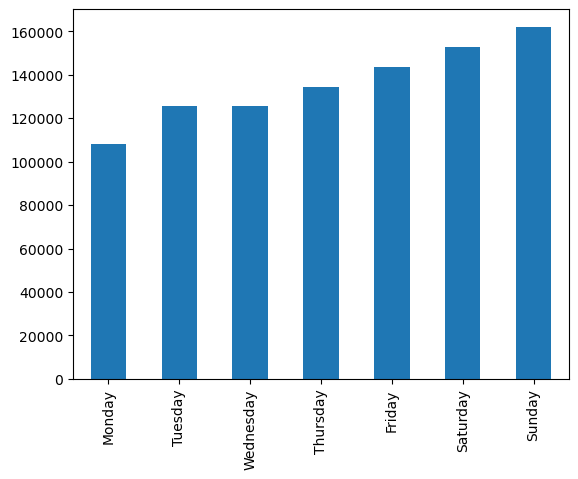

In [48]:
train.groupby(train.index.day_name()).mean().sort_values('day_num').sales_total.plot.bar()
plt.show()

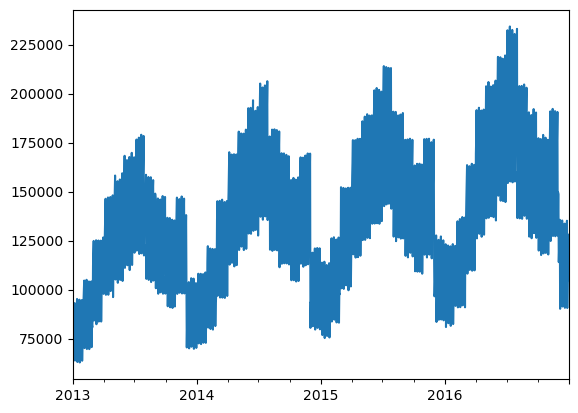

In [26]:
train.sales_total.plot()
plt.show()

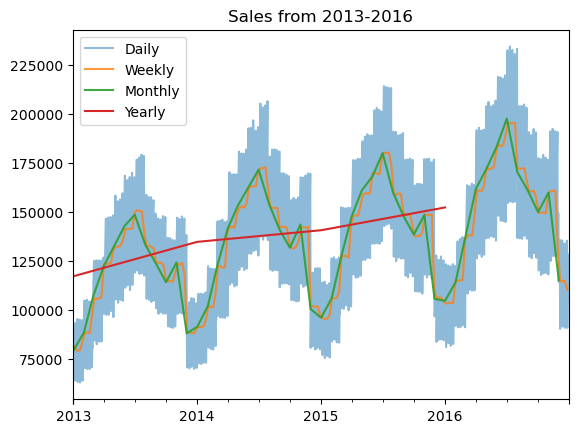

In [30]:
train.sales_total.resample('D').mean().plot(alpha=0.5, label='Daily')
train.sales_total.resample('W').mean().plot(alpha=0.8, label='Weekly')
train.sales_total.resample('M').mean().plot(alpha=0.9, label='Monthly')
train.sales_total.resample('Y').mean().plot(label='Yearly')

plt.title('Sales from 2013-2016')
plt.legend()
plt.show()

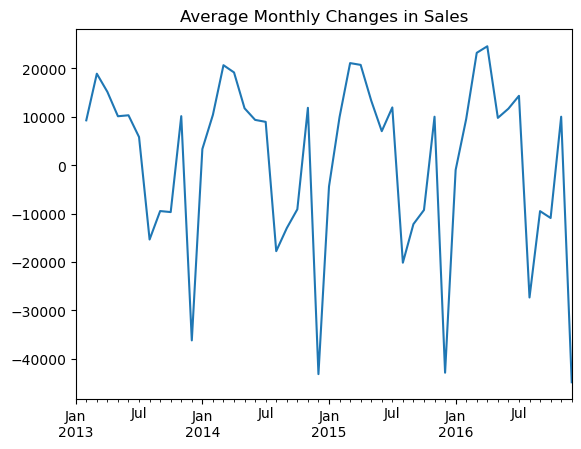

In [55]:
train.sales_total.resample('M').mean().diff().plot()
plt.title('Average Monthly Changes in Sales')
plt.show()

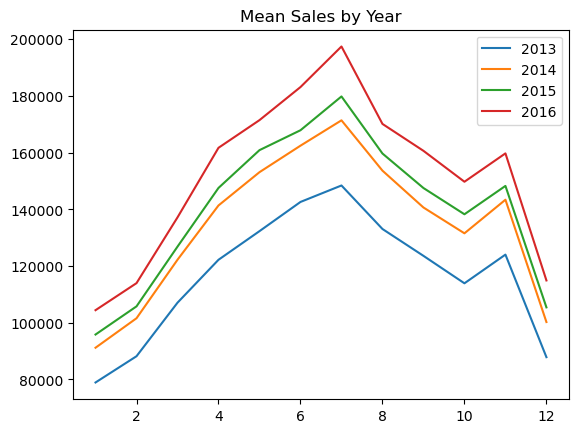

In [56]:
train.sales_total.groupby([train.index.year, train.index.month]).mean().unstack(0).plot()
plt.title('Mean Sales by Year')
plt.show()

In [57]:
table = train.sales_total.groupby([train.index.year, train.index.month]).mean().unstack()


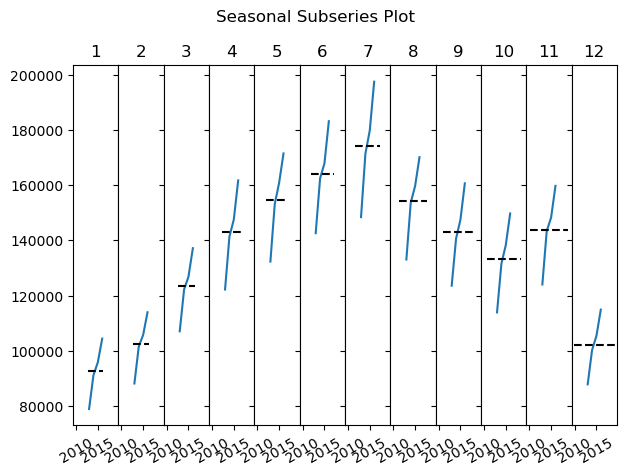

In [59]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

<generator object DataFrame.iteritems at 0x7fe62a96feb0>

In [61]:
energy = prepare.prepare_energy()

In [62]:
energy

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


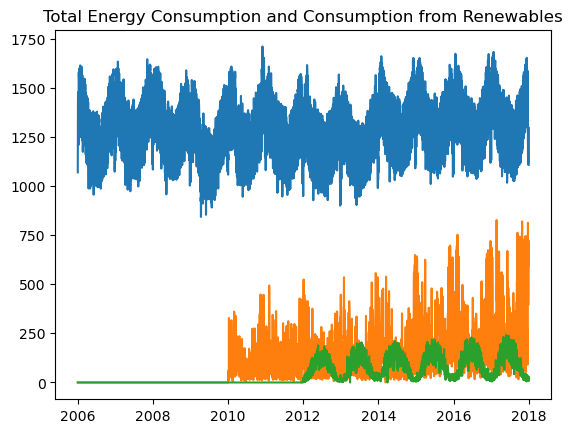

In [95]:
plt.plot(energy.index, energy.consumption, label='Consumption')
plt.plot(energy.index, energy.wind, label='Wind')
plt.plot(energy.index, energy.solar, label='Solar')
#plt.plot(energy.index, energy.wind_solar, label='Solar')
plt.title('Total Energy Consumption and Consumption from Renewables')
plt.show()

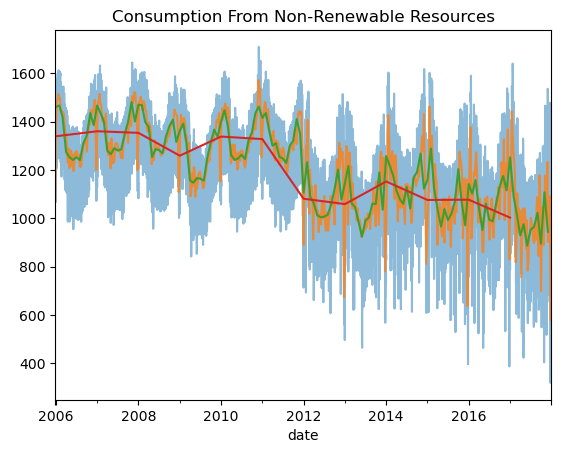

In [93]:
(energy.consumption-energy.wind_solar).resample('D').mean().plot(alpha=0.5, label='Daily')
(energy.consumption-energy.wind_solar).resample('W').mean().plot(alpha=0.8, label='Weekly')
(energy.consumption-energy.wind_solar).resample('M').mean().plot(alpha=0.9, label='Monthly')
(energy.consumption-energy.wind_solar).resample('Y').mean().plot(label='Yearly')
plt.title('Consumption From Non-Renewable Resources')
plt.show()

In [81]:
energy['percentage_nonrenewable'] = ((energy.consumption - energy.wind - energy.solar) / energy.consumption) * 100

Text(0.5, 1.0, 'Percentage of Consumption from Non-Renewable Resources')

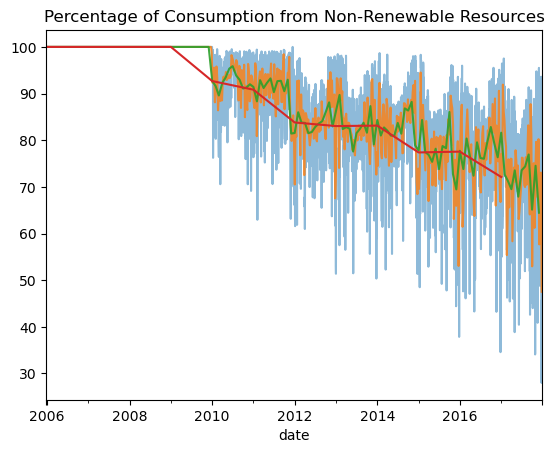

In [82]:
energy.percentage_nonrenewable.resample('D').mean().plot(alpha=0.5, label='Daily')
energy.percentage_nonrenewable.resample('W').mean().plot(alpha=0.8, label='Weekly')
energy.percentage_nonrenewable.resample('M').mean().plot(alpha=0.9, label='Monthly')
energy.percentage_nonrenewable.resample('Y').mean().plot(label='Yearly')

plt.title('Percentage of Consumption from Non-Renewable Resources')

In [87]:
train = energy.loc[:'2015']
test = energy.loc['2016':]

Text(0.5, 1.0, 'Percentage of Consumption from Non-Renewable Resources')

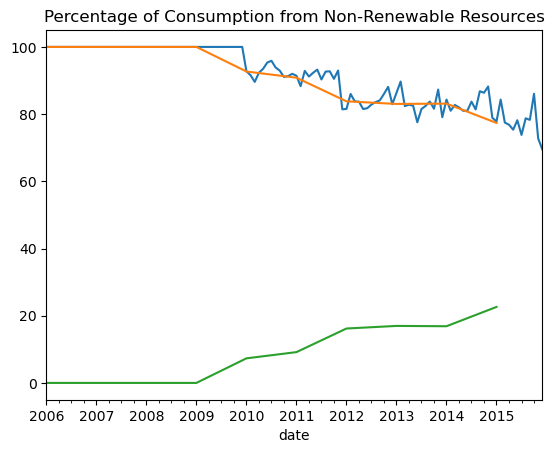

In [97]:
#train.percentage_nonrenewable.resample('D').mean().plot(alpha=0.5, label='Daily')
#train.percentage_nonrenewable.resample('W').mean().plot(alpha=0.8, label='Weekly')
train.percentage_nonrenewable.resample('M').mean().plot(label='Monthly')
train.percentage_nonrenewable.resample('Y').mean().plot(label='Yearly')
(100 - train.percentage_nonrenewable).resample('Y').mean().plot(label='Monthly')
plt.title('Percentage of Consumption from Non-Renewable Resources')

In [98]:
import statsmodels.api as sm


consumption = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(consumption)
decomposition = pd.DataFrame({
    'consumption': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,consumption,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-43.458036,NaN
2006-01-08,1381.300143,NaN,-147.058362,NaN
2006-01-15,1486.730286,NaN,-3.385190,NaN
2006-01-22,1490.031143,NaN,103.169142,NaN
2006-01-29,1514.176857,NaN,125.746777,NaN


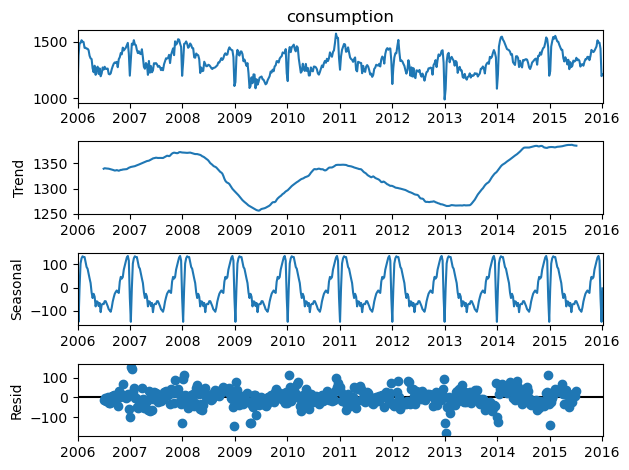

In [99]:
result.plot()
plt.show()

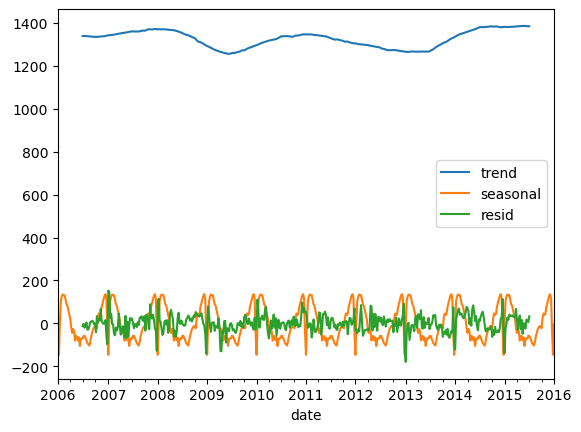

In [101]:
decomposition.iloc[:,1:].plot()

plt.show()

In [103]:
import statsmodels.api as sm


percent = train.percentage_nonrenewable.resample('W').mean()

result = sm.tsa.seasonal_decompose(percent)
decomposition = pd.DataFrame({
    'percentage_nonrenewable': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,percentage_nonrenewable,trend,seasonal,resid
date,,,,
2006-01-01,100.0,NaN,-0.744561,NaN
2006-01-08,100.0,NaN,-4.821054,NaN
2006-01-15,100.0,NaN,-5.264142,NaN
2006-01-22,100.0,NaN,-2.476714,NaN
2006-01-29,100.0,NaN,0.812232,NaN


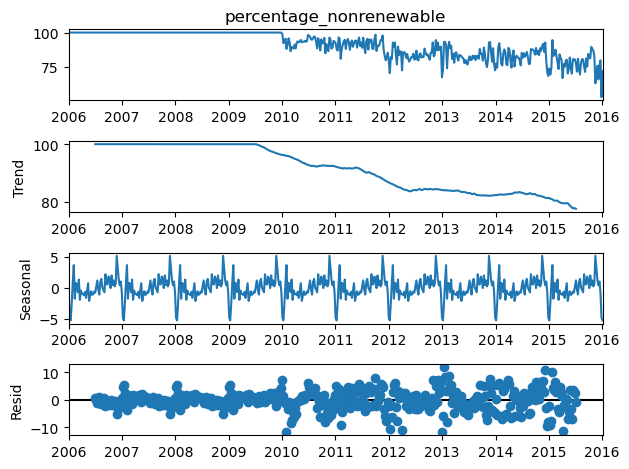

In [104]:
result.plot()
plt.show()

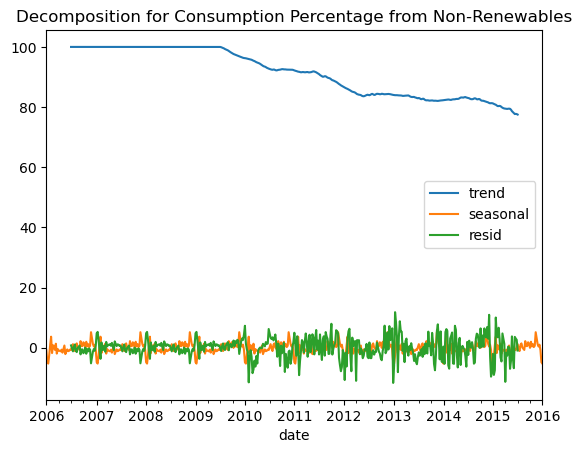

In [106]:
decomposition.iloc[:,1:].plot()
plt.title('Decomposition for Consumption Percentage from Non-Renewables')
plt.show()

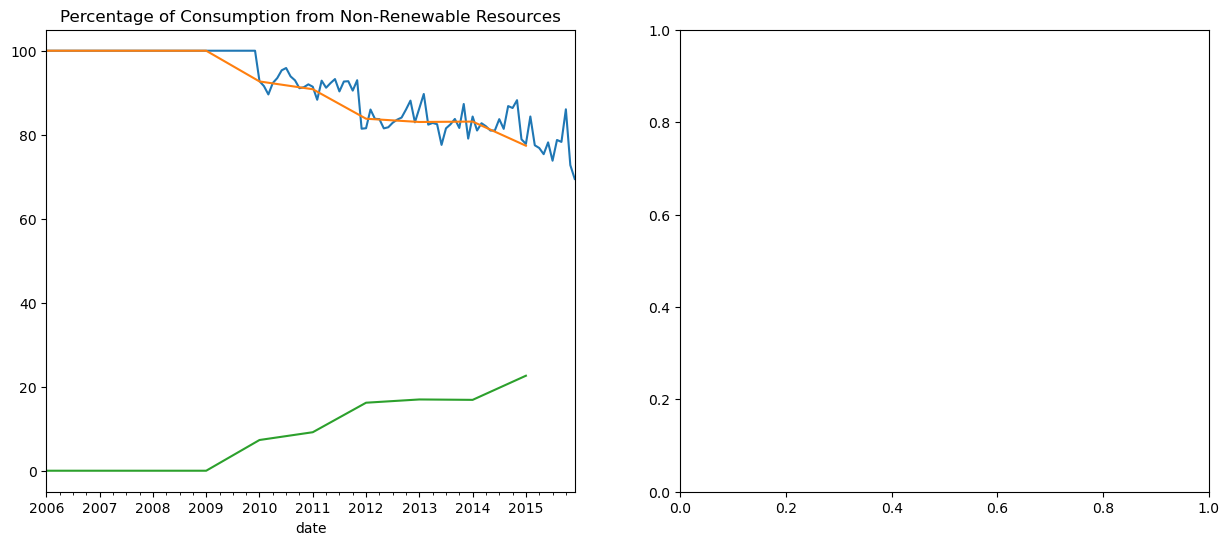

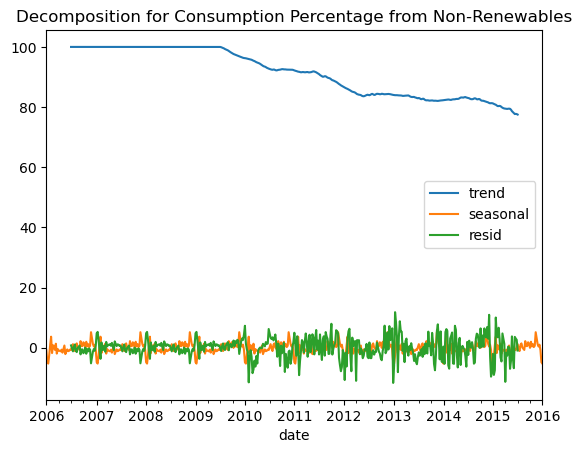

In [132]:
plt.figure(figsize=(15,6))

plt.subplot(121)

train.percentage_nonrenewable.resample('M').mean().plot()
train.percentage_nonrenewable.resample('Y').mean().plot()
(100 - train.percentage_nonrenewable).resample('Y').mean().plot()
plt.title('Percentage of Consumption from Non-Renewable Resources')

plt.subplot(122)

decomposition.iloc[:,1:].plot()
plt.title('Decomposition for Consumption Percentage from Non-Renewables')
plt.show()

In [133]:
train.head()

,consumption,wind,solar,wind_solar,month,year,percentage_nonrenewable
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,100.0
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,100.0
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,100.0
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,100.0
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,100.0
